<a href="https://colab.research.google.com/github/aksl007/ai_source/blob/main/03_01_logistic_regression_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# z = pd.concat([X, y], axis=1)

z = pd.concat([pd.DataFrame(X, columns=data.feature_names), pd.DataFrame(y)], axis=1)
z.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df2 = pd.DataFrame(data.target, columns=['target'])

df2.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
df.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
z.corr()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,0
0,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
2,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
3,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
4,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
5,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
6,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
7,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
8,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
9,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [ ]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

<Axes: >

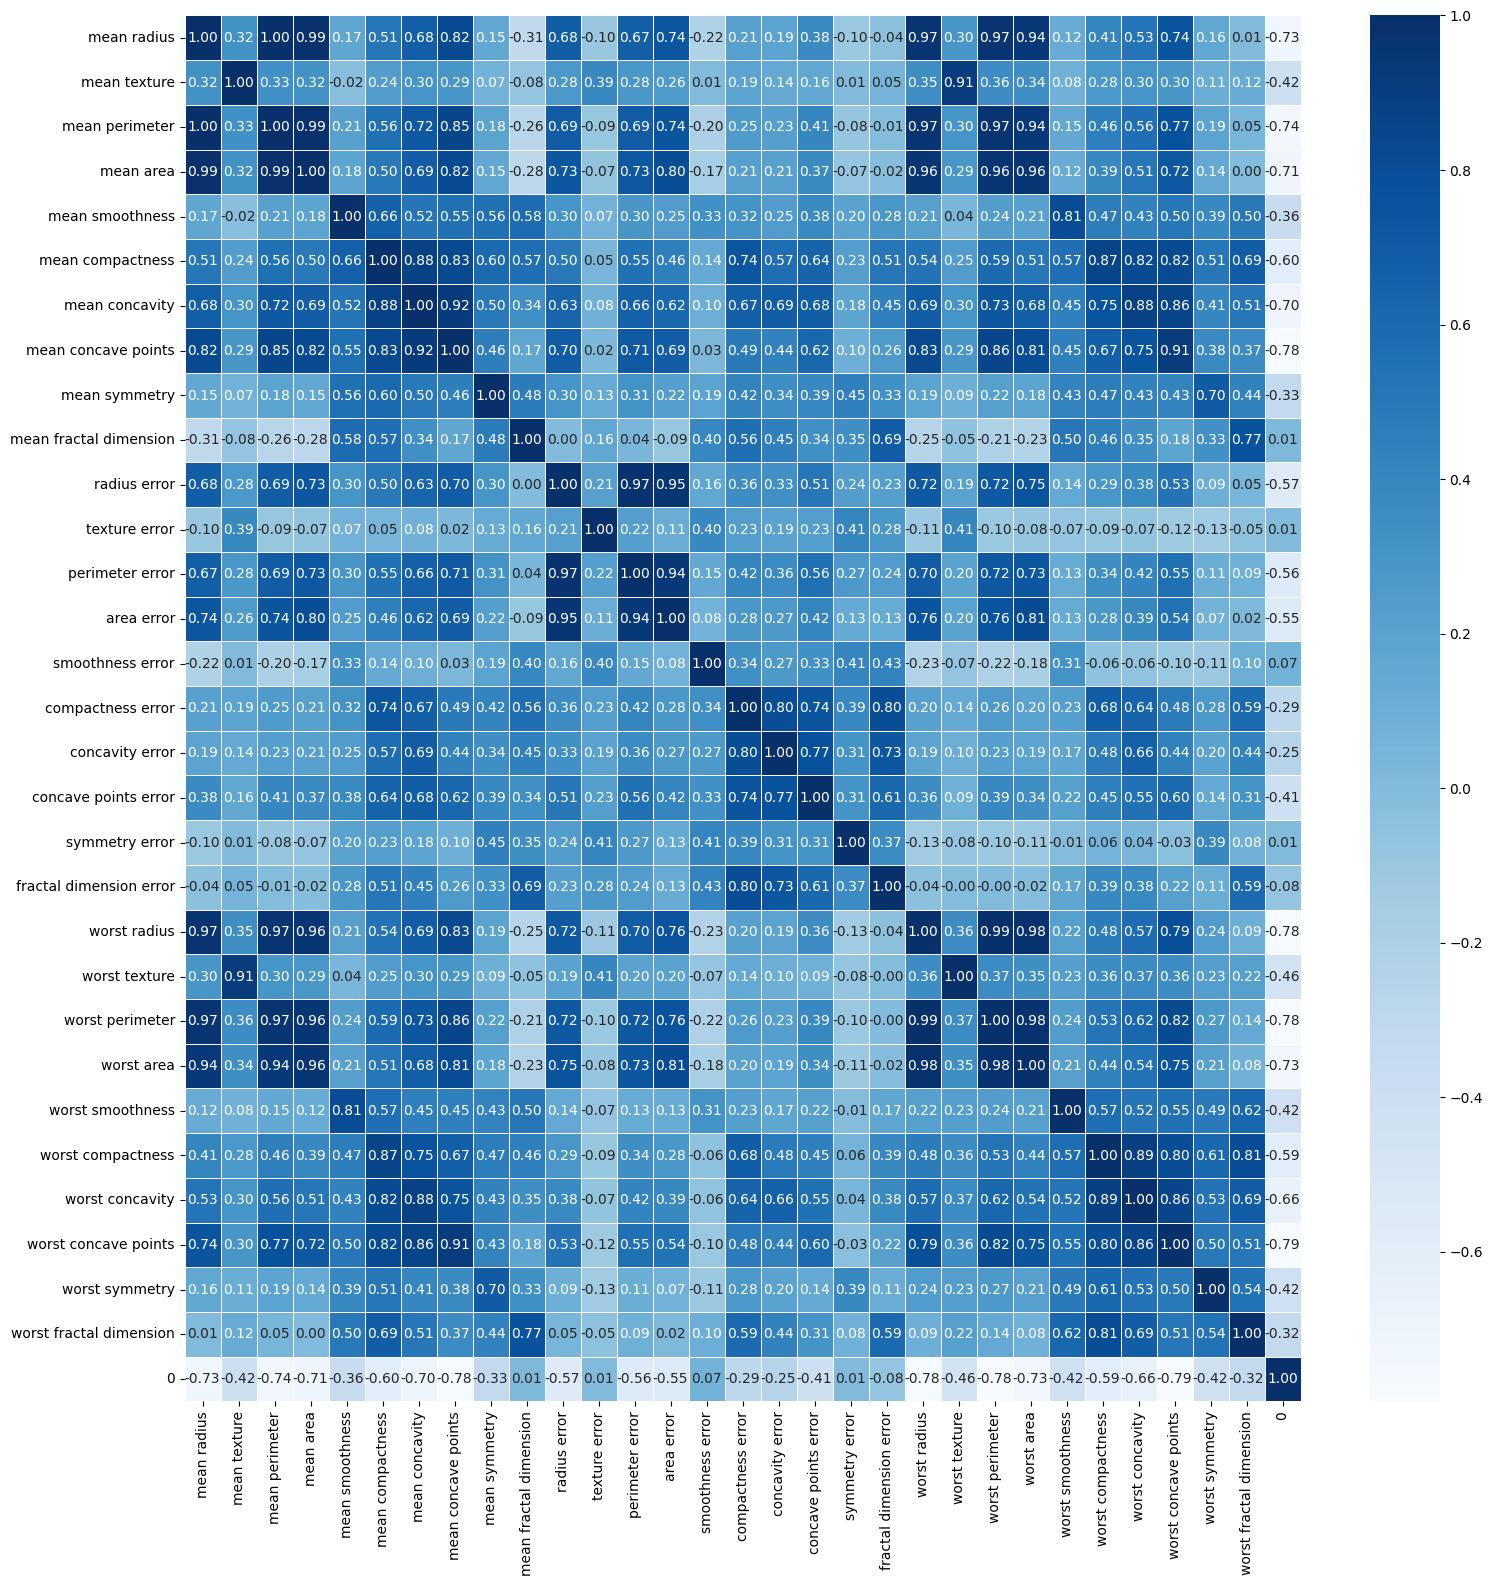

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(data = z.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# Convert the data to a Pandas DataFrame
features = ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']
df = df[features]
df.head()

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concave points
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.2654
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.1860
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.2430
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.2575
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.1625


In [ ]:
df.shape[1]

9

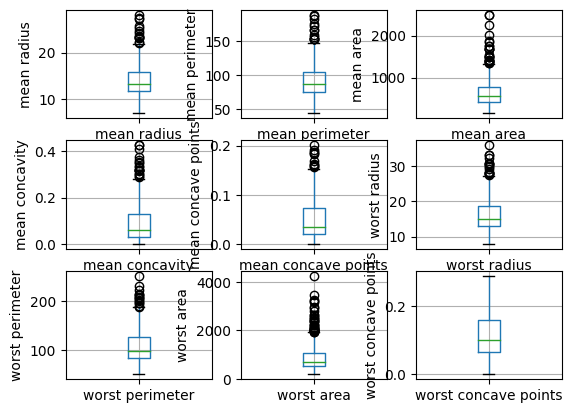

In [ ]:
# 이상치 확인
plt.figure()
for i in range(df.shape[1]):
    plt.subplot(3,3,i+1)
    df[[features[i]]].boxplot()
    plt.ylabel(features[i])


In [ ]:
#이상치 제거 함수
def detect_outliers(df,columns):
    q1=df[columns].quantile(0.25)
    q3=df[columns].quantile(0.75)
    iqr=q3-q1

    boundary=1.5*iqr

    index1=df[df[columns] > q3+boundary].index
    index2=df[df[columns] < q1-boundary].index

    df[columns]=df[columns].drop(index1)
    df[columns]=df[columns].drop(index2)

    return df

In [ ]:
df_copy = df.copy()
df_copy.head()

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concave points
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.2654
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.1860
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.2430
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.2575
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.1625


In [ ]:
#이상치 제거
for i in range(df.shape[1]):
    detect_outliers(df_copy,features[i])

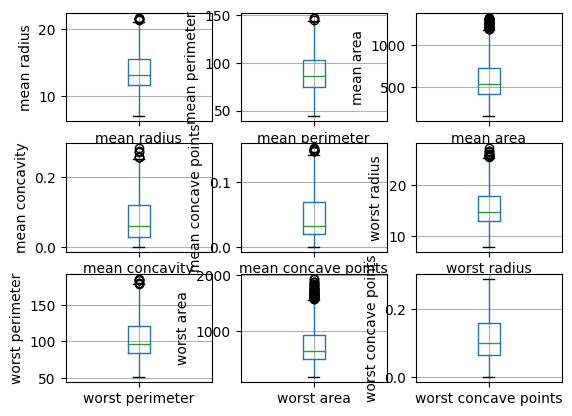

In [ ]:
# 이상치 재확인
plt.figure()
for i in range(df.shape[1]):
    plt.subplot(3,3,i+1)
    df_copy[[features[i]]].boxplot()
    plt.ylabel(features[i])



In [ ]:
df_copy.tail()

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concave points
564,21.56,142.00,NaN,0.24390,0.13890,25.450,166.10,NaN,0.2216
565,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.1628
566,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.1418
567,20.60,140.10,1265.0,NaN,0.15200,25.740,184.60,1821.0,0.2650
568,7.76,47.92,181.0,0.00000,0.00000,9.456,59.16,268.6,0.0000


In [ ]:
df_copy.isna().sum()

,0
mean radius,14
mean perimeter,13
mean area,25
mean concavity,18
mean concave points,10
worst radius,17
worst perimeter,15
worst area,35
worst concave points,0


In [ ]:
#결측치가 된 이상값, 중앙값으로 채우기
for i in range(df.shape[1]):
    df_copy[features[i]].fillna(df_copy[features[i]].median(), inplace=True)

In [ ]:
df_copy.isna().sum()

,0
mean radius,0
mean perimeter,0
mean area,0
mean concavity,0
mean concave points,0
worst radius,0
worst perimeter,0
worst area,0
worst concave points,0


In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(df_copy, y, test_size=0.2, random_state=42)

# 특성 스케일링 ... 여러 스케일러 확인, 이상치 확인
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.55508431, -1.47251081, -1.31604519, ..., -1.33435045,
        -1.15787557,  0.9320124 ],
       [ 2.34514036,  2.49632279,  2.59461822, ...,  2.47274999,
        -0.29391555,  2.6989469 ],
       [-1.50851832, -1.45311834, -1.2776945 , ..., -1.33126361,
        -1.19604721, -0.97023893],
       ...,
       [ 0.14619104,  0.01787111,  0.09297366, ..., -0.34176048,
        -0.21691866, -1.23903365],
       [ 0.04594482,  0.05665604, -0.02908476, ...,  0.32568254,
         0.26597866,  1.05001236],
       [-0.53613   , -0.60079584, -0.54829401, ..., -0.67994075,
        -0.57458164, -0.61102866]])

In [ ]:
# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

In [ ]:
# 모델 성능 평가        ### 다른 변수 조합에서의 결과 비교해 보기
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#0.9736842105263158

Accuracy: 0.9736842105263158
Confusion Matrix:
 [[42  1]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

